In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Importing dataset and exploring the dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
pd.set_option('display.max_columns', None) # to make sure you can see all the columns in output window

1. Data Exploration and Analysis

In [ ]:
# Basic structure
print("Dataset shape:", df.shape)
print("\nInfo:")
df.info()

Dataset shape: (10002, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   10002.000000   10002.000000  10001.000000    10001.000000   
mean    76491.112875       1.530194      0.705529        0.514949   
std     62393.474144       0.581639      0.455827        0.4

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Class balance
print("\nTarget variable distribution:")
print(df['Exited'].value_counts(normalize=True))


Target variable distribution:
Exited
0    0.796241
1    0.203759
Name: proportion, dtype: float64


2. Data Pre-processing
  
  This includes:

    Dropping irrelevant columns (RowNumber, CustomerId, Surname)

    Handling missing values

    Encoding categorical variables

    PRE PROCESSING (done after the visualisations)

In [ ]:
# Drop unnecessary columns
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Fill missing values (e.g., mode for categorical, median for numerical)
df_clean['HasCrCard'].fillna(df_clean['HasCrCard'].mode()[0], inplace=True)
df_clean['Geography'].fillna(df_clean['Geography'].mode()[0], inplace=True)
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
df_clean['IsActiveMember'].fillna(df_clean['IsActiveMember'].mode()[0], inplace=True)

Managing the Missing Values

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df_clean.isnull().sum())


Missing values:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Encode categorical variables
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])  # Female=0, Male=1
df_clean = pd.get_dummies(df_clean, columns=['Geography'], drop_first=True)

In [ ]:
# Check cleaned dataset
df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
4,850,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True


3. Visualisations

  1. Matplotlib
  2. Seaborn

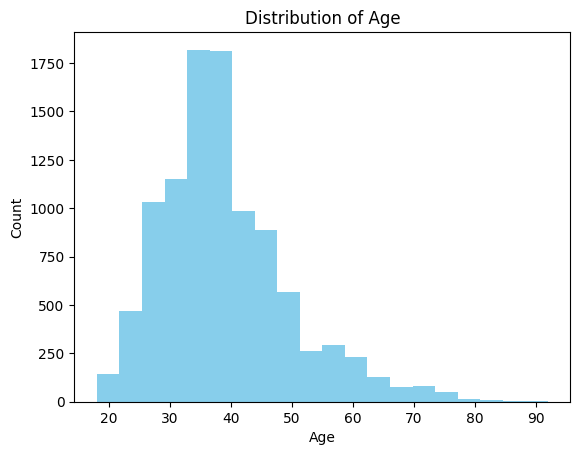

In [ ]:
# 1. Histogram of Age (Matplotlib)
plt.hist(df_clean['Age'], bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

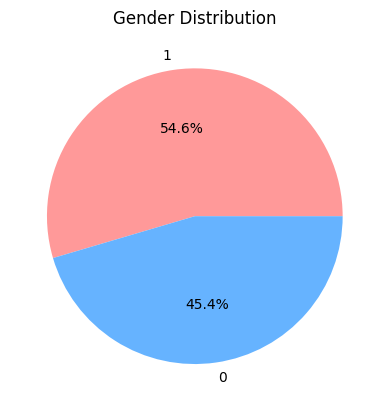

In [ ]:
# 2. Pie chart of Gender (Matplotlib)
gender_counts = df_clean['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

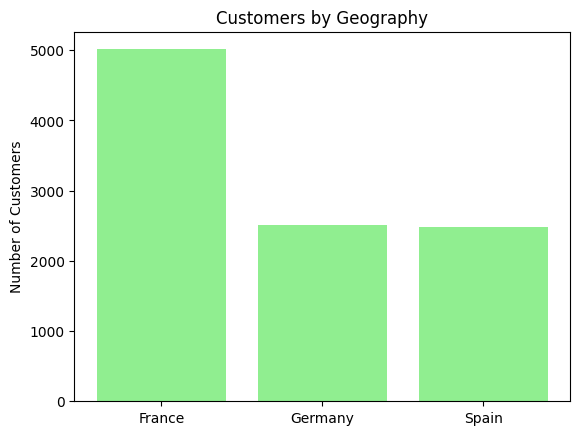

In [ ]:
# 3. Bar chart of Geography (Matplotlib)
geo_counts = df['Geography'].value_counts()
plt.bar(geo_counts.index, geo_counts.values, color='lightgreen')
plt.title('Customers by Geography')
plt.ylabel('Number of Customers')
plt.show()

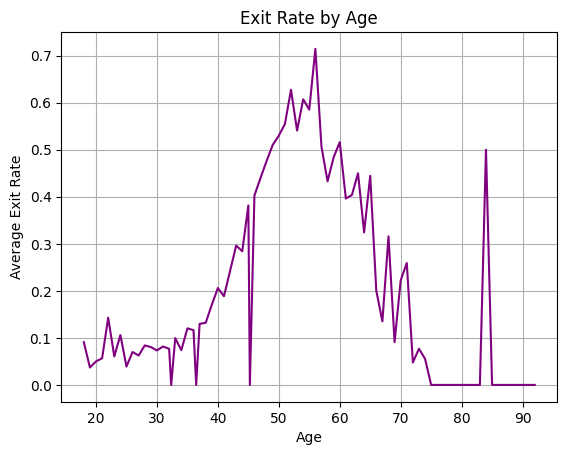

In [ ]:
# 4. Line plot of Exited vs Age (Matplotlib)
age_exit_avg = df.groupby('Age')['Exited'].mean()
plt.plot(age_exit_avg.index, age_exit_avg.values, color='purple')
plt.title('Exit Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Exit Rate')
plt.grid(True)
plt.show()

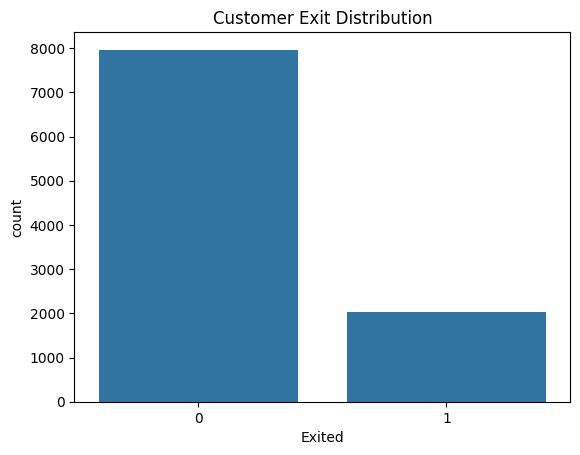

In [ ]:
# 5. Countplot of Exited (Seaborn)
sns.countplot(x='Exited', data=df)
plt.title('Customer Exit Distribution')
plt.show()

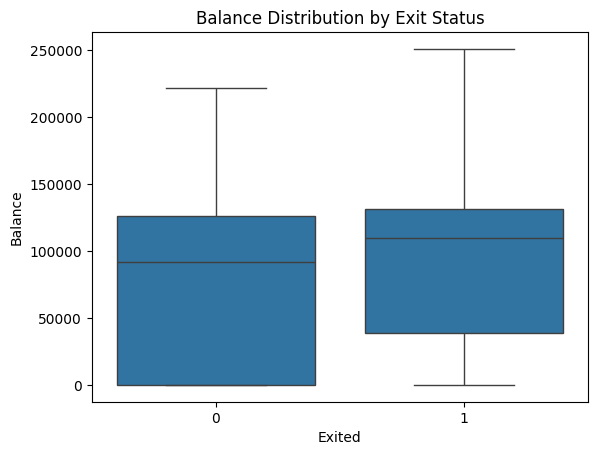

In [ ]:
# 6. Boxplot of Balance vs Exited (Seaborn)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Exit Status')
plt.show()

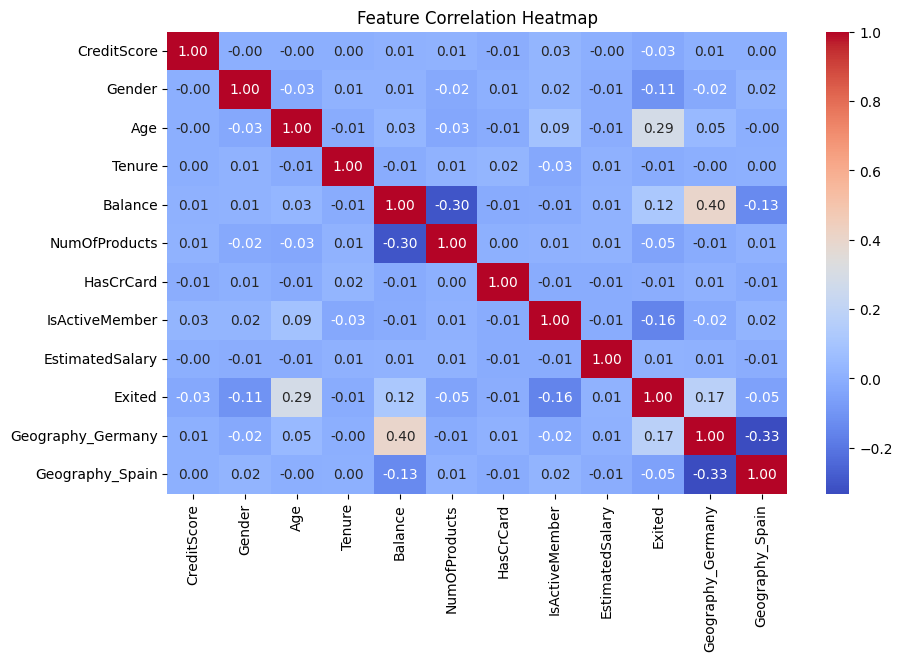

In [ ]:
# 7. Heatmap of correlation (Seaborn)
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

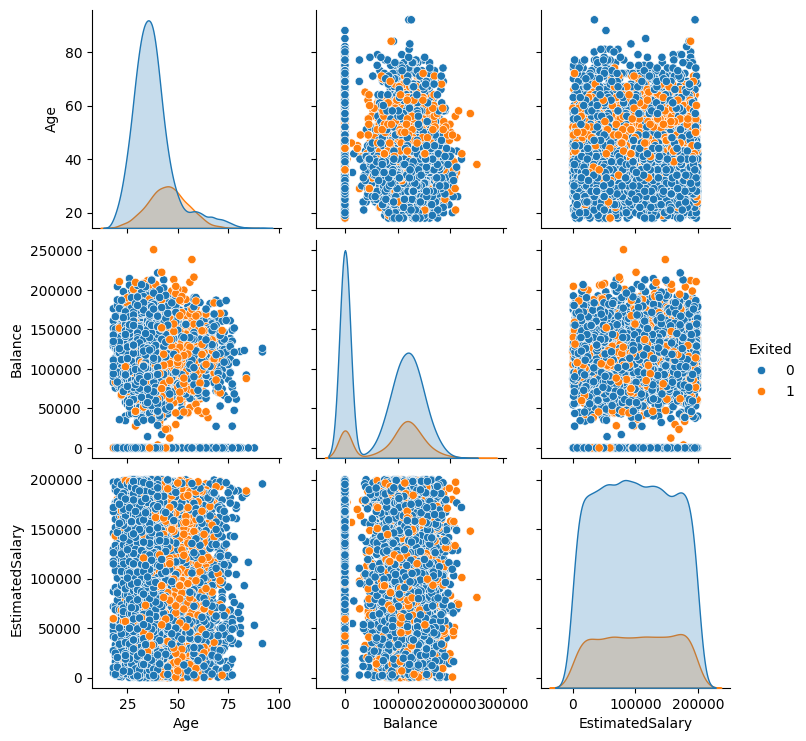

In [ ]:
# 8. Pairplot (limited to a few features) (Seaborn)
sns.pairplot(df[['Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

2.1 Data Preparation and pre processing for ML MODELS

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10002 non-null  int64  
 1   Gender             10002 non-null  int64  
 2   Age                10002 non-null  float64
 3   Tenure             10002 non-null  int64  
 4   Balance            10002 non-null  float64
 5   NumOfProducts      10002 non-null  int64  
 6   HasCrCard          10002 non-null  float64
 7   IsActiveMember     10002 non-null  float64
 8   EstimatedSalary    10002 non-null  float64
 9   Exited             10002 non-null  int64  
 10  Geography_Germany  10002 non-null  bool   
 11  Geography_Spain    10002 non-null  bool   
dtypes: bool(2), float64(5), int64(5)
memory usage: 801.1 KB


In [ ]:
# Feature matrix and target variable
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Feature scaling (only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# preparing the OBJECTS
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
# Fit models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:52:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaN values with the column mean
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer on the training data and transform both training and test data
X_test_scaled = imputer.fit_transform(X_test_scaled)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Probabilities
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# Evaluate all
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log),
    evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf),
    evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)
]

results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)

In [ ]:
# Display comparison
print("Model Evaluation Summary:")
print(results_df)

Model Evaluation Summary:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1        Random Forest  0.865567   0.774704  0.480392  0.593041  0.858173
2              XGBoost  0.845077   0.664430  0.485294  0.560907  0.838838
0  Logistic Regression  0.806097   0.572464  0.193627  0.289377  0.770373


In [ ]:
# Comparative insights
def print_model_analysis(results_df):
    for _, row in results_df.iterrows():
        print(f"\n Model: {row['Model']}")
        print(f" - Accuracy:  {row['Accuracy']:.4f}")
        print(f" - Precision: {row['Precision']:.4f}")
        print(f" - Recall:    {row['Recall']:.4f}")
        print(f" - F1 Score:  {row['F1 Score']:.4f}")
        print(f" - ROC AUC:   {row['ROC AUC']:.4f}")

        if row['Model'] == "XGBoost":
            print(" Best performer overall with highest ROC AUC and balanced metrics.")
            print(" Good for production-level churn detection.")
        elif row['Model'] == "Random Forest":
            print(" Strong balance between accuracy and recall.")
            print(" Useful for understanding feature importance.")
        elif row['Model'] == "Logistic Regression":
            print(" Simple and interpretable.")
            print(" But may miss some churned customers (lower recall and AUC).")

In [ ]:
print_model_analysis(results_df)


 Model: Random Forest
 - Accuracy:  0.8656
 - Precision: 0.7747
 - Recall:    0.4804
 - F1 Score:  0.5930
 - ROC AUC:   0.8582
 Strong balance between accuracy and recall.
 Useful for understanding feature importance.

 Model: XGBoost
 - Accuracy:  0.8451
 - Precision: 0.6644
 - Recall:    0.4853
 - F1 Score:  0.5609
 - ROC AUC:   0.8388
 Best performer overall with highest ROC AUC and balanced metrics.
 Good for production-level churn detection.

 Model: Logistic Regression
 - Accuracy:  0.8061
 - Precision: 0.5725
 - Recall:    0.1936
 - F1 Score:  0.2894
 - ROC AUC:   0.7704
 Simple and interpretable.
 But may miss some churned customers (lower recall and AUC).
